### Creating An ANN using Pytorch

In [2]:
import pandas as pd
df=pd.read_csv('../datasets/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [5]:
import numpy as np
df['Outcome']=np.where(df['Outcome']==1,"Diabetic","No Diabetic")

In [6]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetic
1,1,85,66,29,0,26.6,0.351,31,No Diabetic
2,8,183,64,0,0,23.3,0.672,32,Diabetic
3,1,89,66,23,94,28.1,0.167,21,No Diabetic
4,0,137,40,35,168,43.1,2.288,33,Diabetic


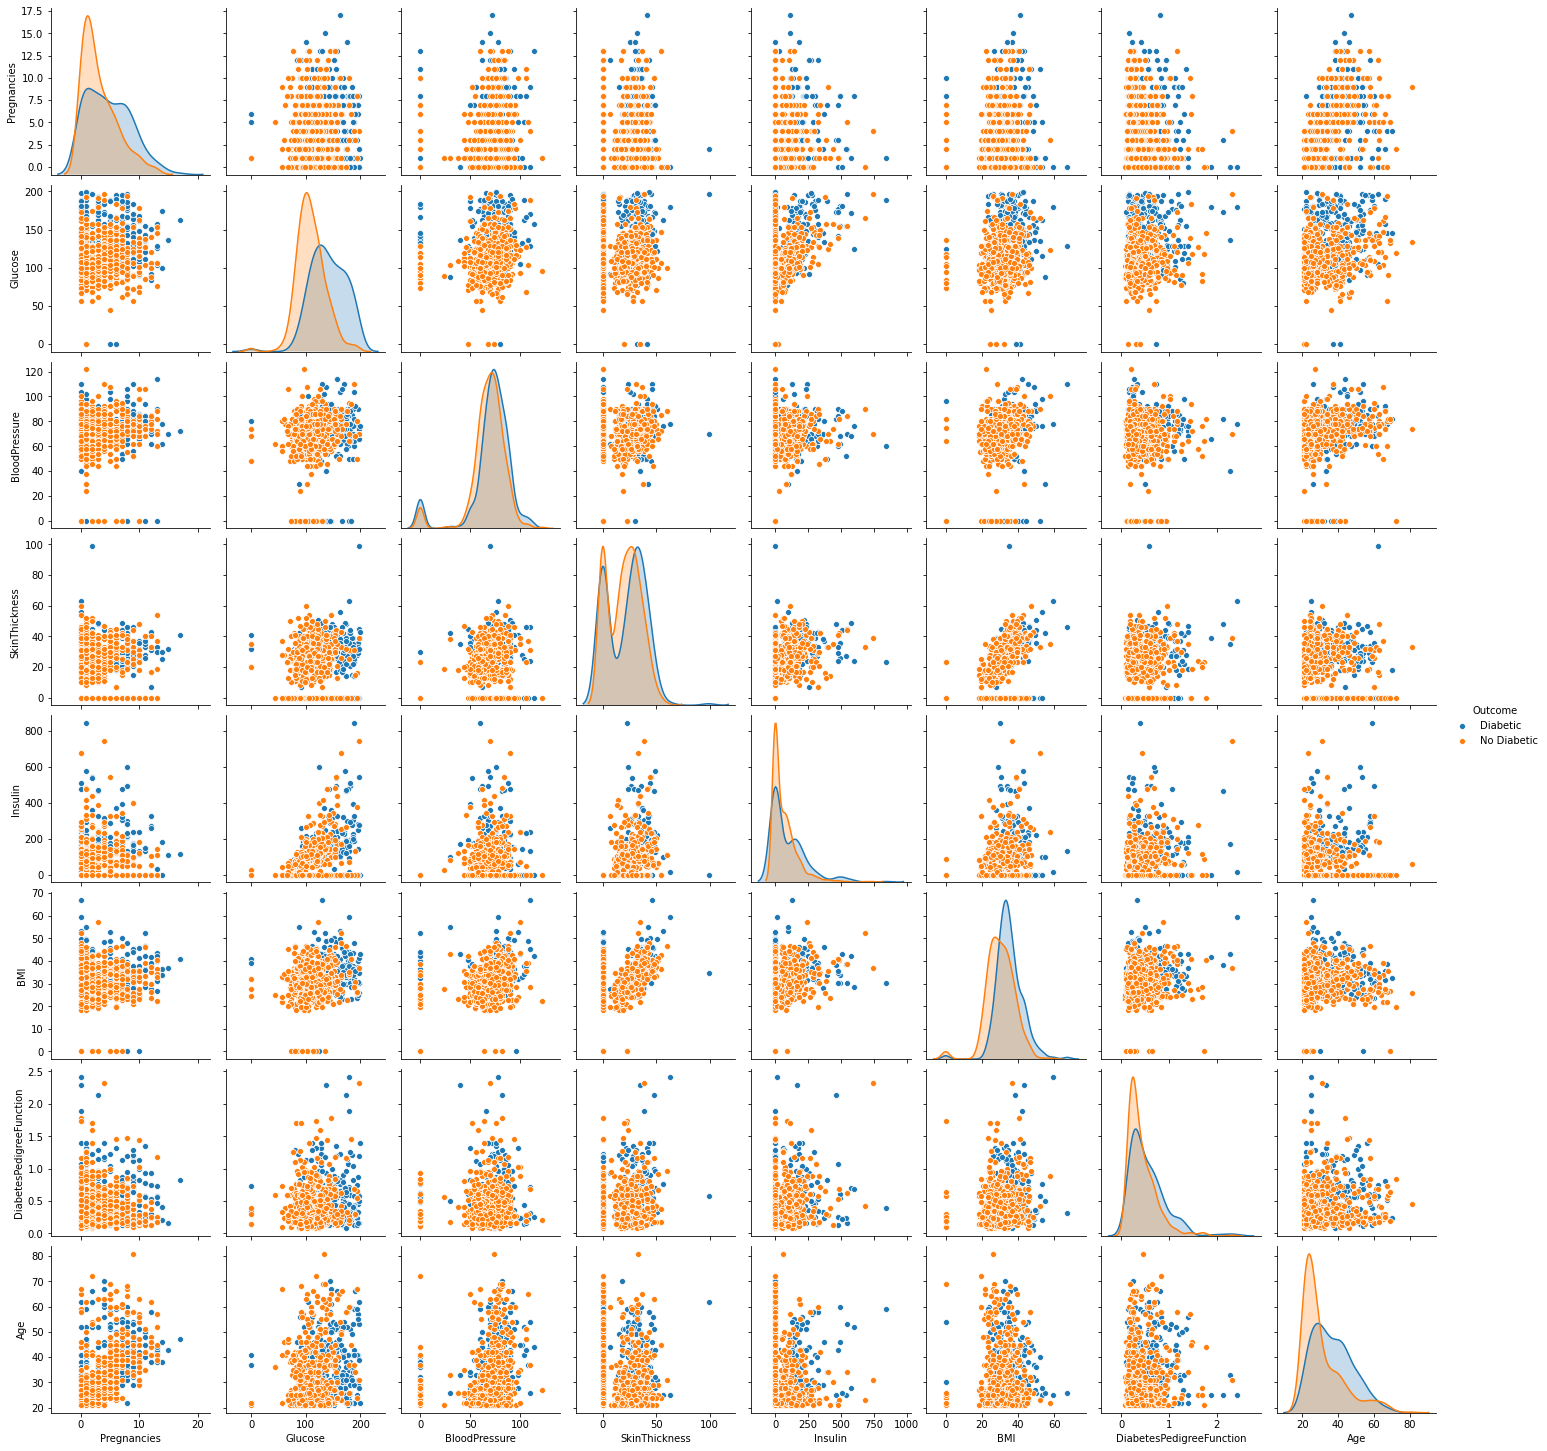

In [7]:
sns.pairplot(df,hue="Outcome")

In [8]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [9]:
X=df.drop('Outcome',axis=1).values### independent features
y=df['Outcome'].values###dependent features

In [10]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
#### Libraries From Pytorch
import torch
from torch import nn
import torch.nn.functional as func

In [12]:
##### Creating Tensors
X_train1=torch.FloatTensor(X_train)
X_test1=torch.FloatTensor(X_test)
y_train1=torch.LongTensor(y_train)
y_test1=torch.LongTensor(y_test)


In [13]:
df.shape

(768, 9)

In [14]:
#### Creating Modelwith Pytorch

class ANN_Model(nn.Module):
    def __init__(self,input_features=8,hidden1=20,hidden2=20,out_features=2):
        super().__init__()
        self.f_connected1=nn.Linear(input_features,hidden1)
        self.f_connected2=nn.Linear(hidden1,hidden2)
        self.out=nn.Linear(hidden2,out_features)
    def forward(self,x):
        x=func.relu(self.f_connected1(x))
        x=func.relu(self.f_connected2(x))
        x=self.out(x)
        return x

In [15]:
#### Creating Modelwith Pytorch

# class ANN_Model(nn.Module):
#     def __init__(self,input_features=8,hidden=[20,20],out_features=2):
#         super().__init__()
#         if(len(hidden)==0):
#             self.out=nn.Linear(input_features,out_features)
#         else:
#             self.f_connected1=nn.Linear(input_features,hidden[0])
#             for i in range(len(hidden)-1):
#                 self.f_connected2=nn.Linear(hidden[i],hidden[i+1])
#             self.out=nn.Linear(hidden[-1],out_features)
#     def forward(self,x):
#         x=func.relu(self.f_connected1(x))
#         x=func.relu(self.f_connected2(x))
#         x=self.out(x)
#         return x

In [16]:
####instantiate my ANN_model
torch.manual_seed(20)
model=ANN_Model()

In [17]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [18]:
###Backward Propogation-- Define the loss_function,define the optimizer
loss_function=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)

In [19]:
epochs=500
final_losses=[]
for i in range(epochs):
    i=i+1
    y_pred=model.forward(X_train1)           # Gets output
    loss=loss_function(y_pred,y_train1)      # Outputs loss
    final_losses.append(loss)               # Append the loss values for plotting use
    if i%10==1:
        print("Epoch number: {} and the loss : {}".format(i,loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number: 1 and the loss : 3.4572105407714844
Epoch number: 11 and the loss : 0.8019207715988159
Epoch number: 21 and the loss : 0.6090320944786072
Epoch number: 31 and the loss : 0.5917770862579346
Epoch number: 41 and the loss : 0.5679708123207092
Epoch number: 51 and the loss : 0.5529041886329651
Epoch number: 61 and the loss : 0.5410094857215881
Epoch number: 71 and the loss : 0.5310391187667847
Epoch number: 81 and the loss : 0.5220361351966858
Epoch number: 91 and the loss : 0.5135971903800964
Epoch number: 101 and the loss : 0.5061254501342773
Epoch number: 111 and the loss : 0.4983411133289337
Epoch number: 121 and the loss : 0.49605506658554077
Epoch number: 131 and the loss : 0.4828636944293976
Epoch number: 141 and the loss : 0.4756036400794983
Epoch number: 151 and the loss : 0.47992444038391113
Epoch number: 161 and the loss : 0.47928282618522644
Epoch number: 171 and the loss : 0.4650002717971802
Epoch number: 181 and the loss : 0.4581979215145111
Epoch number: 191 an

In [20]:
### plot the loss function
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 0, 'Epoch')

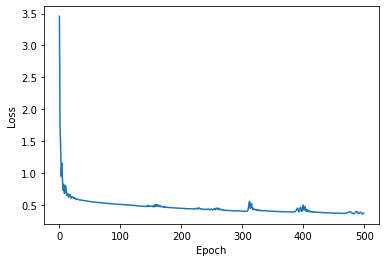

In [21]:
plt.plot(range(epochs),torch.tensor(final_losses).detach().numpy())
plt.ylabel('Loss')
plt.xlabel('Epoch')

In [22]:
#### Prediction In X_test data
predictions=[]
with torch.no_grad():
    for i,data in enumerate(X_test1):
        y_pred=model(data)
        predictions.append(y_pred.argmax().item())
        print(y_pred.argmax().item())

1
0
0
1
0
0
1
1
1
0
1
1
0
1
0
0
1
0
1
0
1
0
0
0
0
1
0
1
0
0
1
0
0
1
0
1
1
0
0
1
0
0
0
1
1
0
0
1
1
0
0
0
1
0
1
1
0
0
0
0
1
1
0
1
1
1
1
0
0
0
0
0
0
1
1
0
0
1
0
0
0
1
0
0
0
0
1
0
1
0
0
0
0
0
1
0
0
0
1
1
0
0
0
0
1
1
0
1
0
1
0
1
1
0
0
1
0
1
0
1
0
0
0
0
0
0
0
0
0
0
1
0
0
1
0
1
1
0
1
0
0
1
0
0
1
0
0
0
0
1
0
0
0
0


In [23]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test1,predictions)
cm

array([[86, 21],
       [11, 36]])

Text(69.0, 0.5, 'Predicted Values')

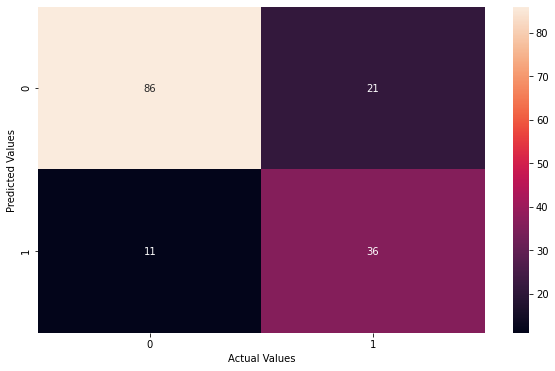

In [24]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [25]:
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test1,predictions)
score

0.7922077922077922

In [26]:
#### Save the model
torch.save(model,'diabetes.pt')

In [27]:
#### Save And Load the model
model=torch.load('diabetes.pt')

In [28]:
model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [29]:
### Predcition of new data point
list(df.iloc[0,:-1])

[6.0, 148.0, 72.0, 35.0, 0.0, 33.6, 0.627, 50.0]

In [30]:
#### New Data
lst1=[6.0, 130.0, 72.0, 40.0, 0.0, 25.6, 0.627, 45.0]

In [31]:
new_data=torch.tensor(lst1)

In [32]:
#### Predict new data using Pytorch
with torch.no_grad():
    print(model(new_data))
    print(model(new_data).argmax().item())

tensor([1.4967, 1.6274])
1


### Comparing with Random Forests

In [78]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(
    n_estimators=1000,
    random_state = 1
)

In [79]:
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)

Text(69.0, 0.5, 'Predicted Values')

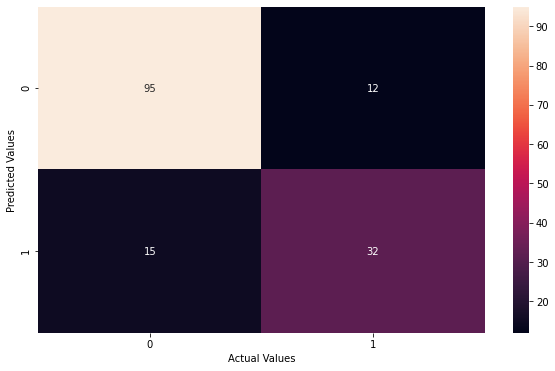

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(cm,annot=True)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [81]:
print('Random Forest Accuracy =',accuracy_score(y_pred,y_test))

Random Forest Accuracy = 0.8246753246753247
